In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

In [2]:
retention_df = pd.read_csv("retentiondata_case.csv")

print("\nMissing values per column:")
print(retention_df.isna().sum())

print("Shape:", retention_df.shape)
print("Columns:", list(retention_df.columns))
retention_df.head()


Missing values per column:
acct_ref                    0
cust_ref                    0
has_dependents              0
tenure_mo                   0
home_phone                  0
multi_line                  0
internet_plan               0
add_on_security             0
add_on_backup               0
add_on_protection           0
tech_support_std            0
stream_tv                   0
stream_movies               0
contract_term               0
e_bill_opt_in               0
pay_method                  0
monthly_fee                 0
total_billed                8
left_flag                   0
fiscal_qtr                  0
gender                      0
age_years                   0
is_married                  0
dependents_count            0
referred_friend             0
referrals_count             0
recent_offer             3106
avg_long_dist_fee           0
internet_tech            1212
avg_gb_download             0
premium_support             0
stream_music                0
unlimited_da

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.0,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,NaN,17.09,DSL,16,No,No,Yes,0.0,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,NaN,10.47,DSL,21,No,No,Yes,0.0,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,NaN,0.00,DSL,10,Yes,No,Yes,0.0,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,NaN,9.12,Fiber Optic,51,No,No,Yes,0.0,0,18.24


## 2. Data cleansing and filling empty values

In [3]:
retention_df['recent_offer']=retention_df['recent_offer'].fillna("None")
retention_df['internet_tech']=retention_df['internet_tech'].fillna("No Internet")
retention_df['total_billed']=retention_df['total_billed'].fillna(0)

In [4]:
print("\nMissing values per column:")
print(retention_df.isna().sum())


Missing values per column:
acct_ref                 0
cust_ref                 0
has_dependents           0
tenure_mo                0
home_phone               0
multi_line               0
internet_plan            0
add_on_security          0
add_on_backup            0
add_on_protection        0
tech_support_std         0
stream_tv                0
stream_movies            0
contract_term            0
e_bill_opt_in            0
pay_method               0
monthly_fee              0
total_billed             0
left_flag                0
fiscal_qtr               0
gender                   0
age_years                0
is_married               0
dependents_count         0
referred_friend          0
referrals_count          0
recent_offer             0
avg_long_dist_fee        0
internet_tech            0
avg_gb_download          0
premium_support          0
stream_music             0
unlimited_data_opt       0
refunds_total            0
extra_data_fees_total    0
long_dist_fees_total     0


## 3. Feature Engineering: 

a. Adding a column for >3 referrals

In [5]:
retention_df['>_3_Referrals'] = np.where(retention_df['referrals_count'] >= 3, "Yes", "No")

b. Adding a column for married with dependents flag

In [6]:
retention_df["married_with_dependents"] = np.where( (retention_df["is_married"] == "Yes") & (retention_df["dependents_count"] > 0), "Yes", "No" )

c. Creating number of services column

In [7]:
services = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line'
]

retention_df['number_of_services'] = (
    retention_df[services]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

retention_df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,10,No,No,Yes,0.0,0,0.00,No,No,0
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,16,No,No,Yes,0.0,0,581.06,No,No,1
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,21,No,No,Yes,0.0,0,20.94,No,No,1
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,10,Yes,No,Yes,0.0,0,0.00,No,No,0
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,51,No,No,Yes,0.0,0,18.24,No,No,1


d. Creating number of add ons column

In [8]:
add_ons = [
    'add_on_backup',
    'add_on_security',
    'add_on_protection'
]

retention_df['number_of_addons'] = (
   retention_df[add_ons]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

e. Type of technical support

In [9]:
retention_df['support'] = np.select(
    [
        retention_df['premium_support'].eq('Yes'),
        retention_df['tech_support_std'].eq('Yes')
    ],
    [
        'Premium',
        'Standard'
    ],
    default='None'
)

retention_df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,No,Yes,0.0,0,0.00,No,No,0,1,None
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,No,Yes,0.0,0,581.06,No,No,1,2,None
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,No,Yes,0.0,0,20.94,No,No,1,2,None
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,Yes,0.0,0,0.00,No,No,0,2,Premium
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,No,Yes,0.0,0,18.24,No,No,1,0,None


f. Drop columns we are not using 

In [10]:
columns_to_drop = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line',
    'add_on_backup',
    'add_on_security',
    'add_on_protection',
    'premium_support',
    'tech_support_std',
    'acct_ref',
    'cust_ref',
    'gender',
    'fiscal_qtr',
    'internet_plan',
    'referrals_count',
    'referred_friend' 
]

df = retention_df.drop(columns=columns_to_drop)

df.head()

,has_dependents,tenure_mo,contract_term,e_bill_opt_in,pay_method,monthly_fee,total_billed,left_flag,age_years,is_married,...,avg_gb_download,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,Yes,...,10,Yes,0.0,0,0.00,No,No,0,1,None
1,No,34,One year,No,Mailed check,56.95,1889.50,No,46,No,...,16,Yes,0.0,0,581.06,No,No,1,2,None
2,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,No,...,21,Yes,0.0,0,20.94,No,No,1,2,None
3,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,No,...,10,Yes,0.0,0,0.00,No,No,0,2,Premium
4,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,No,...,51,Yes,0.0,0,18.24,No,No,1,0,None


## 4. Partition our data

In [11]:
### For classification problems, first determine the classes of your response variable
print(df["left_flag"].dtype)                     # what type is it? 
print(df["left_flag"].unique())                  # list of unique classes in the response variable
 

object
['No' 'Yes']


In [12]:
Y = (df["left_flag"] == "Yes").astype("int64") # returns True for rows where response == 1 and False otherwise then .astype(int) converts True→1 and False→0, so the “positive” label becomes 1
X = df.drop(columns=["left_flag"]) 

In [13]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,     # 30% test, 70% train
    random_state=99,   # reproducibility
    shuffle=True       # shuffle before splitting
)

# Check shapes
X_train.shape, X_test.shape

((3945, 23), (1691, 23))

## 5. Categorical and Numerical variable preparation

In [14]:
# Needed for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Identify column types from TRAIN ONLY
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

# Build preprocessing (train-only learning happens during .fit())
# numeric variable imputation
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

#categorical variable imputation
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="warn", sparse_output=False))  
])

#Aplpy the preprocessing to numeric and categorical variables
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


In [15]:
pd.Series(Y_train).value_counts(normalize=True)

left_flag
0    0.734601
1    0.265399
Name: proportion, dtype: float64

## 6.XGBoost Model

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#!pip install xgboost if not installed
from xgboost import XGBClassifier


# Stratified CV preserves class balance in each fold (important for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# Pipeline with XGBoost model
xgb_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        n_jobs=2,          # use all cores
        eval_metric="auc",  # pairs well with scoring="roc_auc"
        tree_method="hist", # fast CPU histogram algorithm (use "gpu_hist" if you have a GPU)
        random_state=99
    ))
])

#  Hyperparameter grid (more parameters here: https://federated-xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
param_grid = {
    "model__n_estimators": [200, 600],
    "model__max_depth":    [4, 6, 8],
    "model__learning_rate":[0.035, 0.1],
    "model__subsample":    [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3],
    "model__scale_pos_weight": [1, 2.77]
}

#  Cross-validated grid search (same scoring)
xgb_cv = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

# Fit 
xgb_cv.fit(X_train, Y_train)


print("Best params selected by CV:", xgb_cv.best_params_)
print("Best CV ROC-AUC:", round(xgb_cv.best_score_, 3))

Best params selected by CV: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.035, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__scale_pos_weight': 1, 'model__subsample': 1.0}
Best CV ROC-AUC: 0.896


cat__contract_term_Month-to-month    0.218713
cat__>_3_Referrals_No                0.097135
cat__contract_term_Two year          0.076614
cat__pay_method_Electronic check     0.073074
cat__has_dependents_No               0.052928
cat__married_with_dependents_No      0.047340
cat__contract_term_One year          0.039269
num__dependents_count                0.037315
num__tenure_mo                       0.030084
cat__support_None                    0.029687
dtype: float32

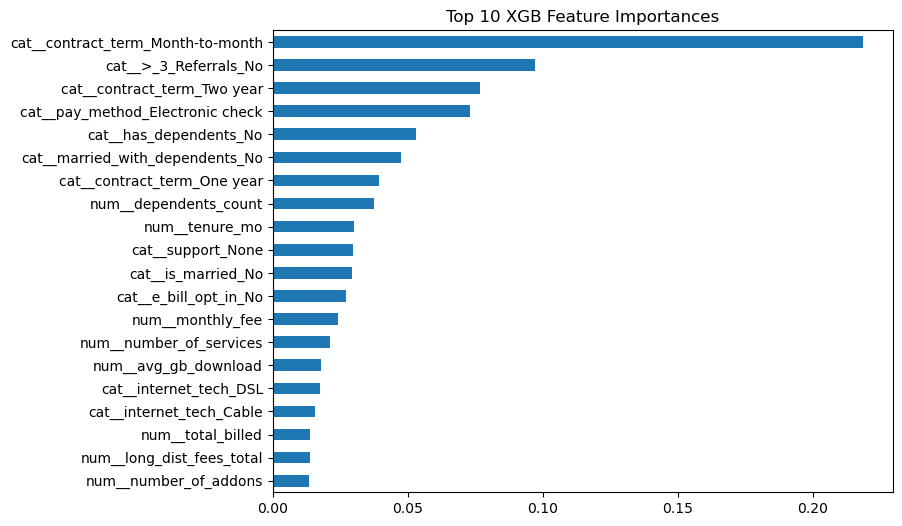

In [17]:
# Get best fitted model from GridSearchCV
best_xgb = xgb_cv.best_estimator_.named_steps["model"]

#get important features
pre = xgb_cv.best_estimator_.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()
imp = pd.Series(best_xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

display(imp.head(10))  # top 10 features


# Optional: plot top features
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
imp.head(20).plot(kind="barh", x="feature", y="importance", legend=False)
plt.title("Top 10 XGB Feature Importances")
plt.gca().invert_yaxis()
plt.show()

## 7. SHAP diagram

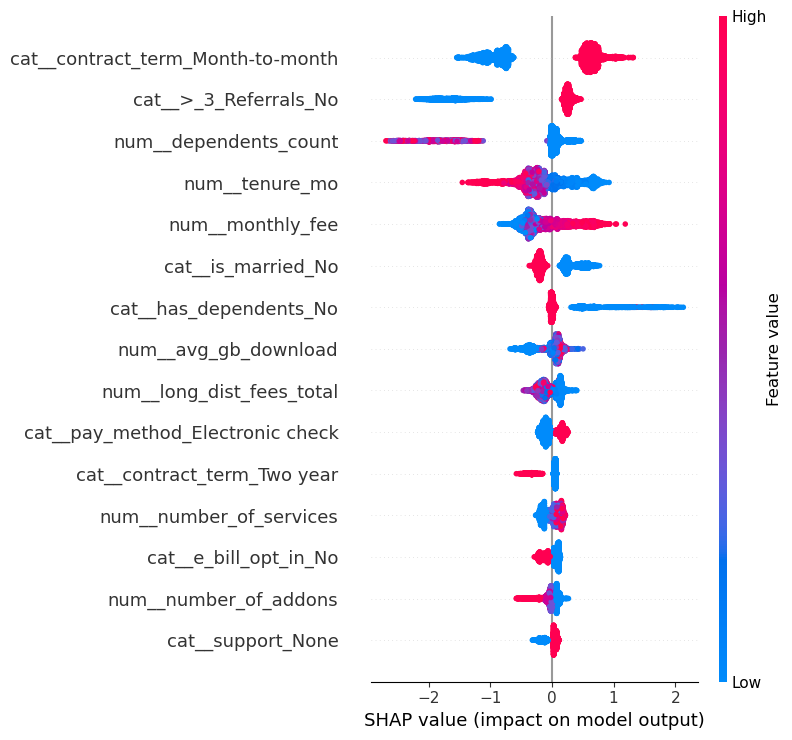

In [18]:
# Assistant
#!pip install shap   # Install SHAP library if not already installed
import shap
import matplotlib.pyplot as plt

pre = xgb_cv.best_estimator_.named_steps["preprocess"]

#  Transform X the same way the model saw it
X_train_enc = pre.transform(X_train)

#  Get feature names after preprocessing (works for ColumnTransformer / Pipeline in sklearn >= 1.0)
feature_names = None
if hasattr(pre, "get_feature_names_out"):
    feature_names = pre.get_feature_names_out()
    
# Create SHAP explainer for the model - use the classifier part of the pipeline
# Make sure to use the actual classifier, not the entire pipeline
best_xgb = xgb_cv.best_estimator_.named_steps["model"]  # Assuming "classifier" is the name of the step
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training set
shap_values = explainer.shap_values(X_train_enc)

# First summary plot with feature names
shap.summary_plot(shap_values, X_train_enc, max_display=15, show=True, feature_names=feature_names)
plt.savefig("shap_summary_1.jpg", dpi=300, bbox_inches="tight")
plt.close()

# Second summary plot - use the same data as used for calculating SHAP values
shap.summary_plot(shap_values, X_train_enc, show=False, feature_names=feature_names)
plt.savefig("shap_summary_2.jpg", dpi=300, bbox_inches="tight")
plt.close()

## 8. Predictions for Test Set

In [19]:
Ytest_prob = xgb_cv.predict_proba(X_test)[:, 1]

## 8.1 Evaluate Test set

Test ROC-AUC: 0.8937


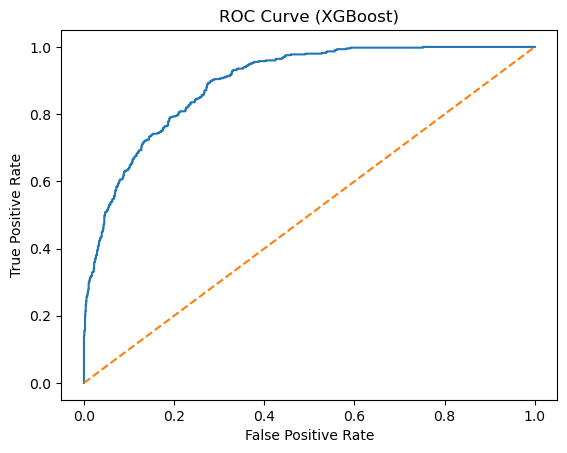

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

test_auc = roc_auc_score(Y_test, Ytest_prob)
print("Test ROC-AUC:", round(test_auc, 4))

# ROC curve (single plot; no custom colors)
fpr, tpr, _ = roc_curve(Y_test, Ytest_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.show()

## Evaluate Holdout data

In [22]:
retention_holdout = pd.read_csv("retentiondata_case_holdout.csv")

print("\nMissing values per column:")
print(retention_holdout.isna().sum())

print("Shape:", retention_holdout.shape)
print("Columns:", list(retention_holdout.columns))
retention_holdout.head()


Missing values per column:
acct_ref                   0
cust_ref                   0
has_dependents             0
tenure_mo                  0
home_phone                 0
multi_line                 0
internet_plan              0
add_on_security            0
add_on_backup              0
add_on_protection          0
tech_support_std           0
stream_tv                  0
stream_movies              0
contract_term              0
e_bill_opt_in              0
pay_method                 0
monthly_fee                0
total_billed               3
left_flag                  0
fiscal_qtr                 0
gender                     0
age_years                  0
is_married                 0
dependents_count           0
referred_friend            0
referrals_count            0
recent_offer             771
avg_long_dist_fee          0
internet_tech            314
avg_gb_download            0
premium_support            0
stream_music               0
unlimited_data_opt         0
refunds_total  

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT316552,CUST36921357,No,8,Yes,Yes,Fiber optic,No,No,Yes,...,NaN,12.15,Cable,26,No,Yes,Yes,0.0,0,97.20
1,ACCT825485,CUST36620628,Yes,10,Yes,No,DSL,No,No,Yes,...,NaN,9.41,Cable,69,Yes,No,Yes,0.0,0,94.10
2,ACCT864200,CUST36841391,No,58,Yes,Yes,DSL,No,Yes,No,...,Offer B,48.98,Cable,76,Yes,No,Yes,0.0,0,2840.84
3,ACCT212862,CUST64450449,Yes,1,No,No phone service,DSL,No,Yes,No,...,NaN,0.00,DSL,58,No,No,Yes,0.0,0,0.00
4,ACCT810870,CUST29231696,Yes,17,Yes,No,DSL,No,No,No,...,NaN,40.55,Cable,41,No,Yes,Yes,0.0,0,689.35


In [23]:
retention_holdout['recent_offer']=retention_holdout['recent_offer'].fillna("None")
retention_holdout['internet_tech']=retention_holdout['internet_tech'].fillna("No Internet")
retention_holdout['total_billed']=retention_holdout['total_billed'].fillna(0)

In [24]:
print("\nMissing values per column:")
print(retention_holdout.isna().sum())


Missing values per column:
acct_ref                 0
cust_ref                 0
has_dependents           0
tenure_mo                0
home_phone               0
multi_line               0
internet_plan            0
add_on_security          0
add_on_backup            0
add_on_protection        0
tech_support_std         0
stream_tv                0
stream_movies            0
contract_term            0
e_bill_opt_in            0
pay_method               0
monthly_fee              0
total_billed             0
left_flag                0
fiscal_qtr               0
gender                   0
age_years                0
is_married               0
dependents_count         0
referred_friend          0
referrals_count          0
recent_offer             0
avg_long_dist_fee        0
internet_tech            0
avg_gb_download          0
premium_support          0
stream_music             0
unlimited_data_opt       0
refunds_total            0
extra_data_fees_total    0
long_dist_fees_total     0


In [25]:
retention_holdout['>_3_Referrals'] = np.where(retention_holdout['referrals_count'] >= 3, "Yes", "No")

retention_holdout["married_with_dependents"] = np.where( (retention_holdout["is_married"] == "Yes") & (retention_holdout["dependents_count"] > 0), "Yes", "No" )

services = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line'
]

retention_holdout['number_of_services'] = (
    retention_holdout[services]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

add_ons = [
    'add_on_backup',
    'add_on_security',
    'add_on_protection'
]

retention_holdout['number_of_addons'] = (
   retention_holdout[add_ons]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

retention_holdout['support'] = np.select(
    [
        retention_holdout['premium_support'].eq('Yes'),
        retention_holdout['tech_support_std'].eq('Yes')
    ],
    [
        'Premium',
        'Standard'
    ],
    default='None'
)

retention_holdout.head()


,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,ACCT316552,CUST36921357,No,8,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,0.0,0,97.20,No,No,5,1,None
1,ACCT825485,CUST36620628,Yes,10,Yes,No,DSL,No,No,Yes,...,No,Yes,0.0,0,94.10,Yes,No,1,1,Premium
2,ACCT864200,CUST36841391,No,58,Yes,Yes,DSL,No,Yes,No,...,No,Yes,0.0,0,2840.84,No,No,2,1,Premium
3,ACCT212862,CUST64450449,Yes,1,No,No phone service,DSL,No,Yes,No,...,No,Yes,0.0,0,0.00,No,No,0,1,None
4,ACCT810870,CUST29231696,Yes,17,Yes,No,DSL,No,No,No,...,Yes,Yes,0.0,0,689.35,No,No,4,0,None


In [26]:
columns_to_drop = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line',
    'add_on_backup',
    'add_on_security',
    'add_on_protection',
    'premium_support',
    'tech_support_std',
    'acct_ref',
    'cust_ref',
    'gender',
    'fiscal_qtr',
    'internet_plan',
    'referrals_count',
    'referred_friend' 
]

holdout = retention_holdout.drop(columns=columns_to_drop)

holdout.head()

,has_dependents,tenure_mo,contract_term,e_bill_opt_in,pay_method,monthly_fee,total_billed,left_flag,age_years,is_married,...,avg_gb_download,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,No,8,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,31,No,...,26,Yes,0.0,0,97.20,No,No,5,1,None
1,Yes,10,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,21,Yes,...,69,Yes,0.0,0,94.10,Yes,No,1,1,Premium
2,No,58,Two year,Yes,Credit card (automatic),59.90,3505.10,No,25,Yes,...,76,Yes,0.0,0,2840.84,No,No,2,1,Premium
3,Yes,1,Month-to-month,No,Electronic check,30.20,30.20,Yes,27,Yes,...,58,Yes,0.0,0,0.00,No,No,0,1,None
4,Yes,17,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes,20,No,...,41,Yes,0.0,0,689.35,No,No,4,0,None


In [27]:
Y_H = (holdout["left_flag"] == "Yes").astype("int64") # returns True for rows where response == 1 and False otherwise then .astype(int) converts True→1 and False→0, so the “positive” label becomes 1
X_H = holdout.drop(columns=["left_flag"]) 

In [28]:
Ytest_holdout = xgb_cv.predict_proba(X_H)[:, 1]

Test ROC-AUC: 0.8915


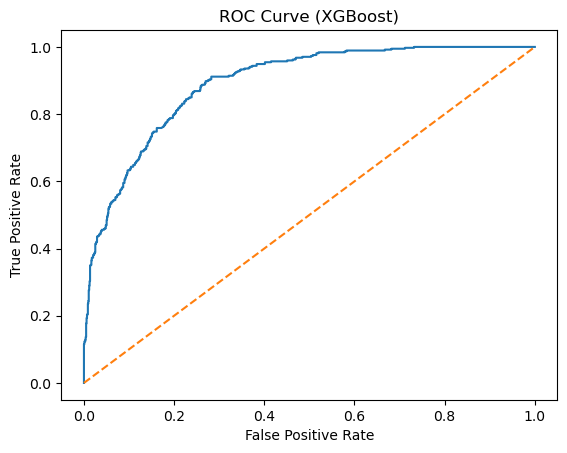

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

test_auc = roc_auc_score(Y_H, Ytest_holdout)
print("Test ROC-AUC:", round(test_auc, 4))

# ROC curve (single plot; no custom colors)
fpr, tpr, _ = roc_curve(Y_H, Ytest_holdout)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.show()

In [30]:
holdout["Yholdout_proba"] = Ytest_holdout
print(holdout.describe(include='all'))

       has_dependents    tenure_mo   contract_term e_bill_opt_in  \
count            1407  1407.000000            1407          1407   
unique              2          NaN               3             2   
top                No          NaN  Month-to-month           Yes   
freq              976          NaN             778           814   
mean              NaN    32.074627             NaN           NaN   
std               NaN    24.739484             NaN           NaN   
min               NaN     0.000000             NaN           NaN   
25%               NaN     9.000000             NaN           NaN   
50%               NaN    27.000000             NaN           NaN   
75%               NaN    56.000000             NaN           NaN   
max               NaN    72.000000             NaN           NaN   

              pay_method  monthly_fee  total_billed left_flag    age_years  \
count               1407  1407.000000   1407.000000      1407  1407.000000   
unique                 4   

In [32]:
holdout.to_csv("retention_holdout_scored_for_turnin.csv", index=False)